In [94]:
import pandas as pd
import matplotlib .pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [95]:
df = pd.read_csv("bengaluru_house_prices.csv")

In [96]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [97]:
df.shape

(13320, 9)

In [98]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [99]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [100]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [101]:
df.area_type.unique() 

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [102]:
df["area_type"].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [103]:
df1 = df.drop(["area_type","society","balcony","availability"],axis = 1)

In [104]:
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [105]:
df1.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [106]:
df2 = df1["bath"].fillna(df1["bath"].median(),inplace =True)

In [107]:
df2 = df1.fillna({"location":0,"size":0})

In [108]:
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [109]:
df2.shape

(13320, 5)

In [110]:
df2["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', 0, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [111]:
df2["bhk"]= df2["size"].astype(str).apply(lambda x:int(x.split(" ")[0]))

In [112]:
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [113]:
df2["bhk"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9,  0, 27, 10, 19, 16, 43, 14,
       12, 13, 18], dtype=int64)

In [114]:
df2[df2["bhk"]>=20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [115]:
df2["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [116]:
def is_float(x):
    try:
        float(x)
        return True
    except ValueError:
        return False
        
        

In [117]:
filtered_df = df2[~df2["total_sqft"].apply(is_float)].head()

In [118]:
filtered_df

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,2.0,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,2.0,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2


In [119]:
def convert_sqft_to_num(x):
    tokens = x.split("-")
    if len(tokens)==2:
        return(float(tokens[0])+ float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
        
        
    
   
   
            

In [120]:
df3 = df2.copy()
a = convert_sqft_to_num("3010 - 3410")

In [121]:
a

3210.0

In [122]:
df3["total_sqft"] = df3["total_sqft"].apply(convert_sqft_to_num)

In [123]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [124]:
df3.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [125]:
mean = (2100+2850)/2

In [126]:
mean

2475.0

In [127]:
df3.loc[56]

location      Devanahalli
size            4 Bedroom
total_sqft         3210.0
bath                  2.0
price               192.0
bhk                     4
Name: 56, dtype: object

In [128]:
df3.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [129]:
df3["price_per_sqft"] = df3["price"]*100000/df3["total_sqft"]

In [130]:
df3.head(4)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861


In [131]:
df3["location"].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [132]:
len(df3["location"].unique())

1306

In [133]:
location_statas = df3["location"].value_counts()

In [134]:
location_statas

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Uvce Layout                         1
Abshot Layout                       1
Name: location, Length: 1306, dtype: int64

In [135]:
location_statas = df.groupby("location")["location"].agg("count").sort_values(ascending = False)

In [136]:
len(location_statas[location_statas<=10])

1064

In [137]:
location_statas1 = location_statas[location_statas<=10]

In [138]:
location_statas1

location
Naganathapura           10
Nagadevanahalli         10
Dodsworth Layout        10
Dairy Circle            10
Nagappa Reddy Layout    10
                        ..
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1064, dtype: int64

In [139]:
df3.location = df3.location.apply(lambda x : "other" if x in location_statas1 else x)
len(df3["location"].unique())

243

In [140]:
df3[df3["total_sqft"]/df3["bhk"]<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,other,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [141]:
df3.shape

(13320, 7)

In [142]:
df4 = df3[~(df3["total_sqft"]/df3["bhk"]<300)]


In [143]:
df4.shape

(12576, 7)

In [144]:
df4["price_per_sqft"].describe()

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [145]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame() 
    for key, subdf in df.groupby("location"):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m - st)) & (subdf.price_per_sqft <= (m + st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out
df5 = remove_pps_outliers(df4)
df5.shape
   

(10303, 7)

In [146]:
import matplotlib.pyplot as plt

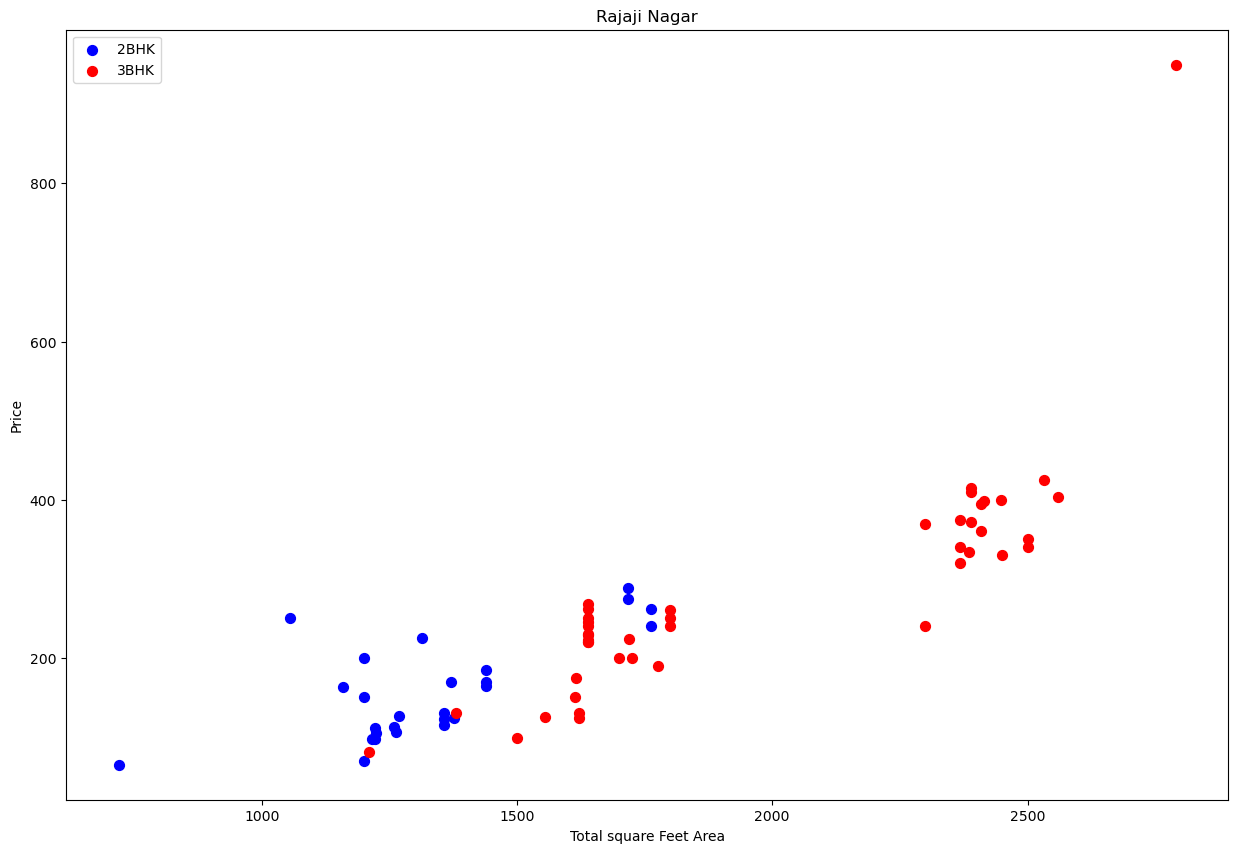

In [147]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location)&(df.bhk==2)]
    bhk3 = df[(df.location==location)&(df.bhk==3)]
    plt.rcParams["figure.figsize"]= (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color= "blue",label="2BHK",s =50)
    plt.scatter(bhk3.total_sqft,bhk3.price,color= "red",label="3BHK",s =50)
    plt.xlabel("Total square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    plt.show()
plot_scatter_chart(df4,"Rajaji Nagar")

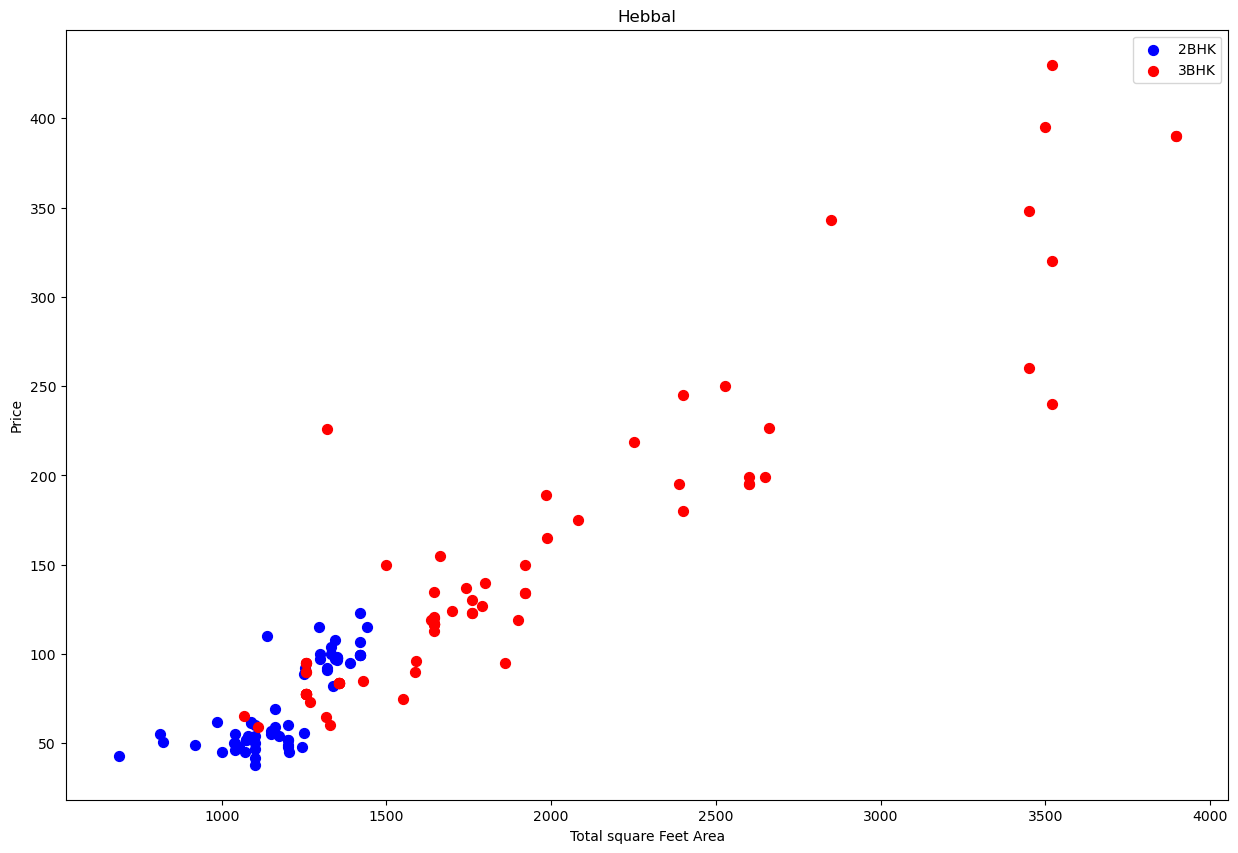

In [148]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location)&(df.bhk==2)]
    bhk3 = df[(df.location==location)&(df.bhk==3)]
    plt.rcParams["figure.figsize"]= (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color= "blue",label="2BHK",s =50)
    plt.scatter(bhk3.total_sqft,bhk3.price,color= "red",label="3BHK",s =50)
    plt.xlabel("Total square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    plt.show()
plot_scatter_chart(df4,"Hebbal")

In [149]:

def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby("location"):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby("bhk"):
            bhk_stats[bhk] = {
                "mean": np.mean(bhk_df.price_per_sqft),
                "std": np.std(bhk_df.price_per_sqft),
                "count": bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby("bhk"):
            stats = bhk_stats.get(bhk - 1)
            if stats and stats["count"] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats["mean"])].index.values)

    return df.drop(exclude_indices, axis="index")

df6 = remove_bhk_outliers(df5)
print(df6.shape)

(7374, 7)


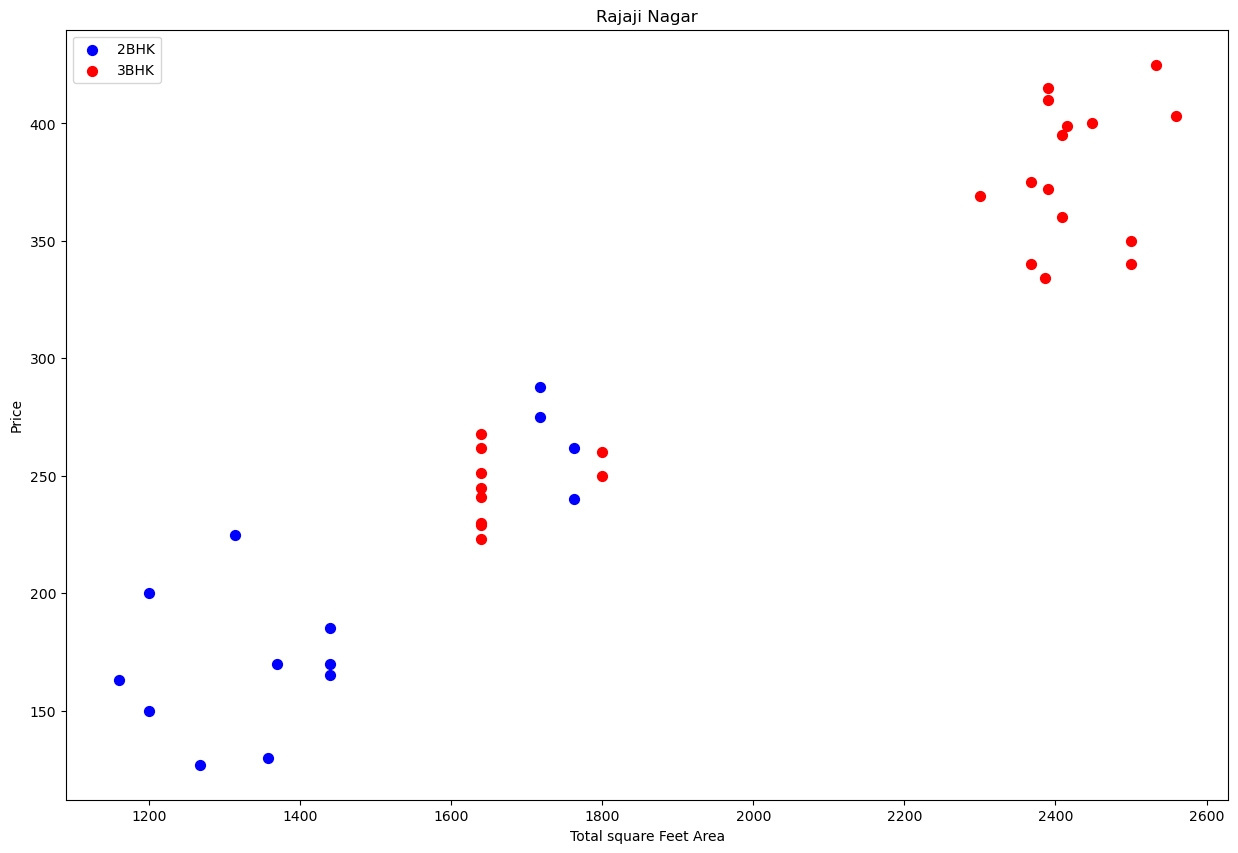

In [150]:
plot_scatter_chart(df6,"Rajaji Nagar")


        
        
           


         
        
        


         

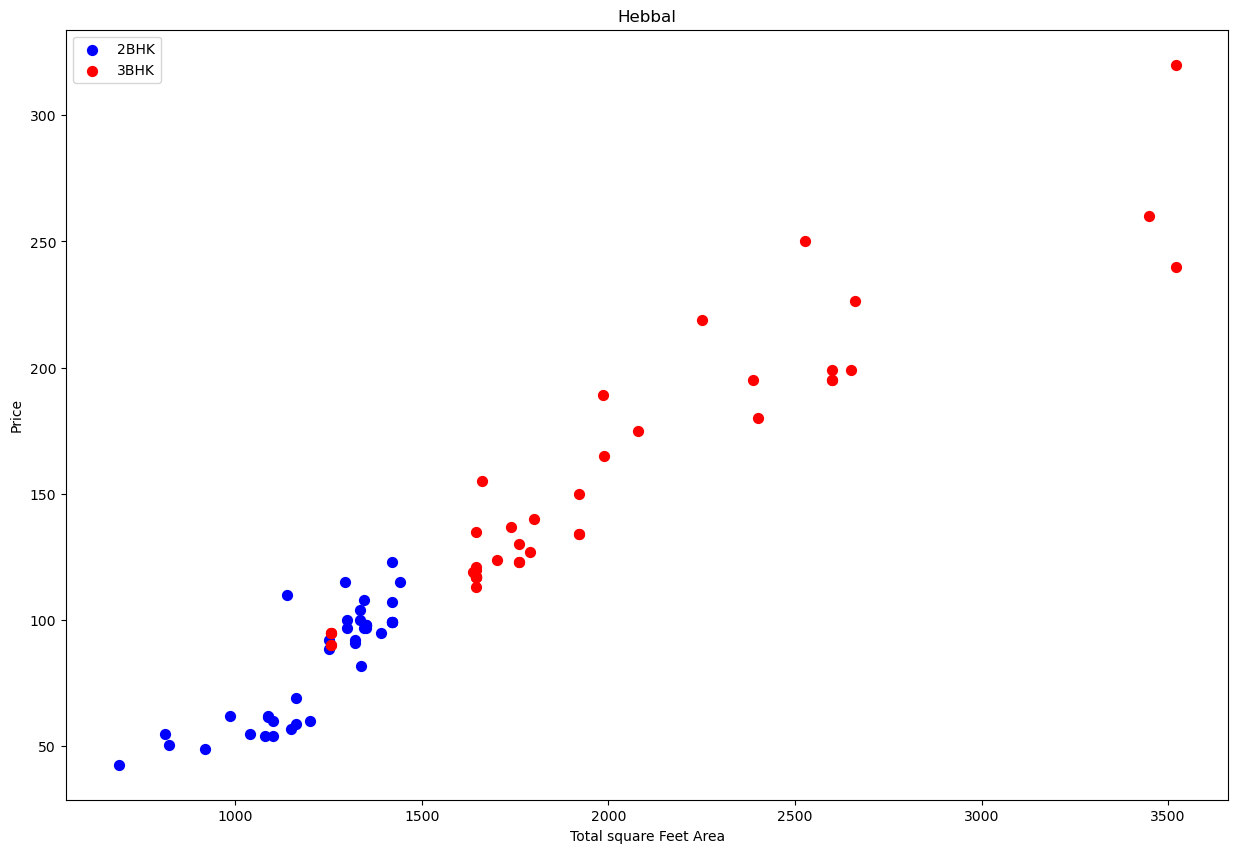

In [151]:
plot_scatter_chart(df6,"Hebbal")

Text(0, 0.5, 'Count')

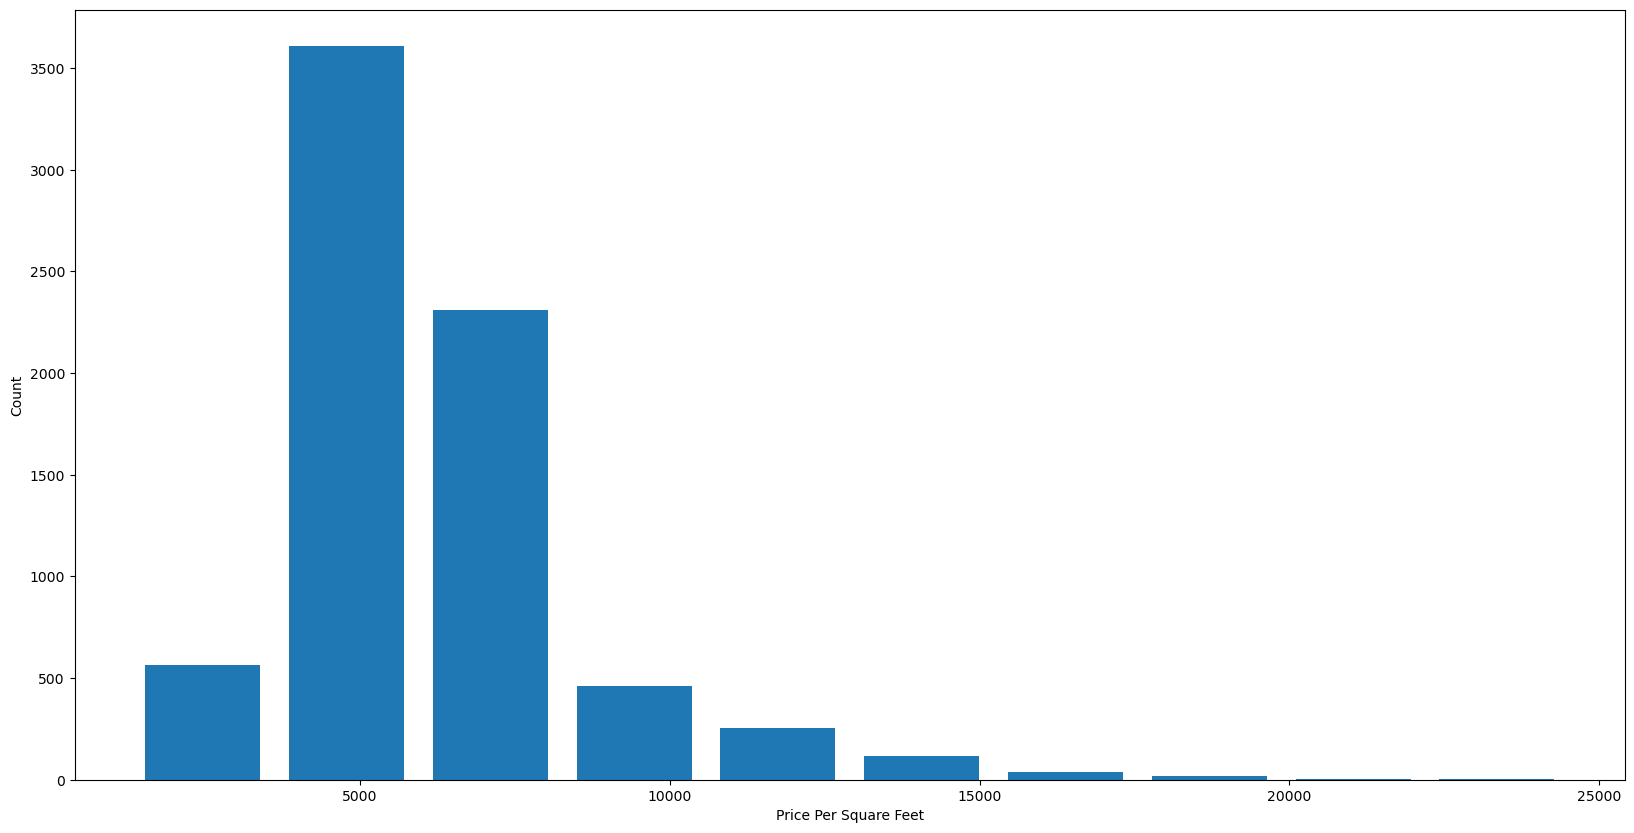

In [152]:
plt.rcParams["figure.figsize"] = (20,10)
plt.hist(df6.price_per_sqft,rwidth = 0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [153]:
df6.bath.unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [154]:
df6[df6.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5307,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8537,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8626,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9365,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9698,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

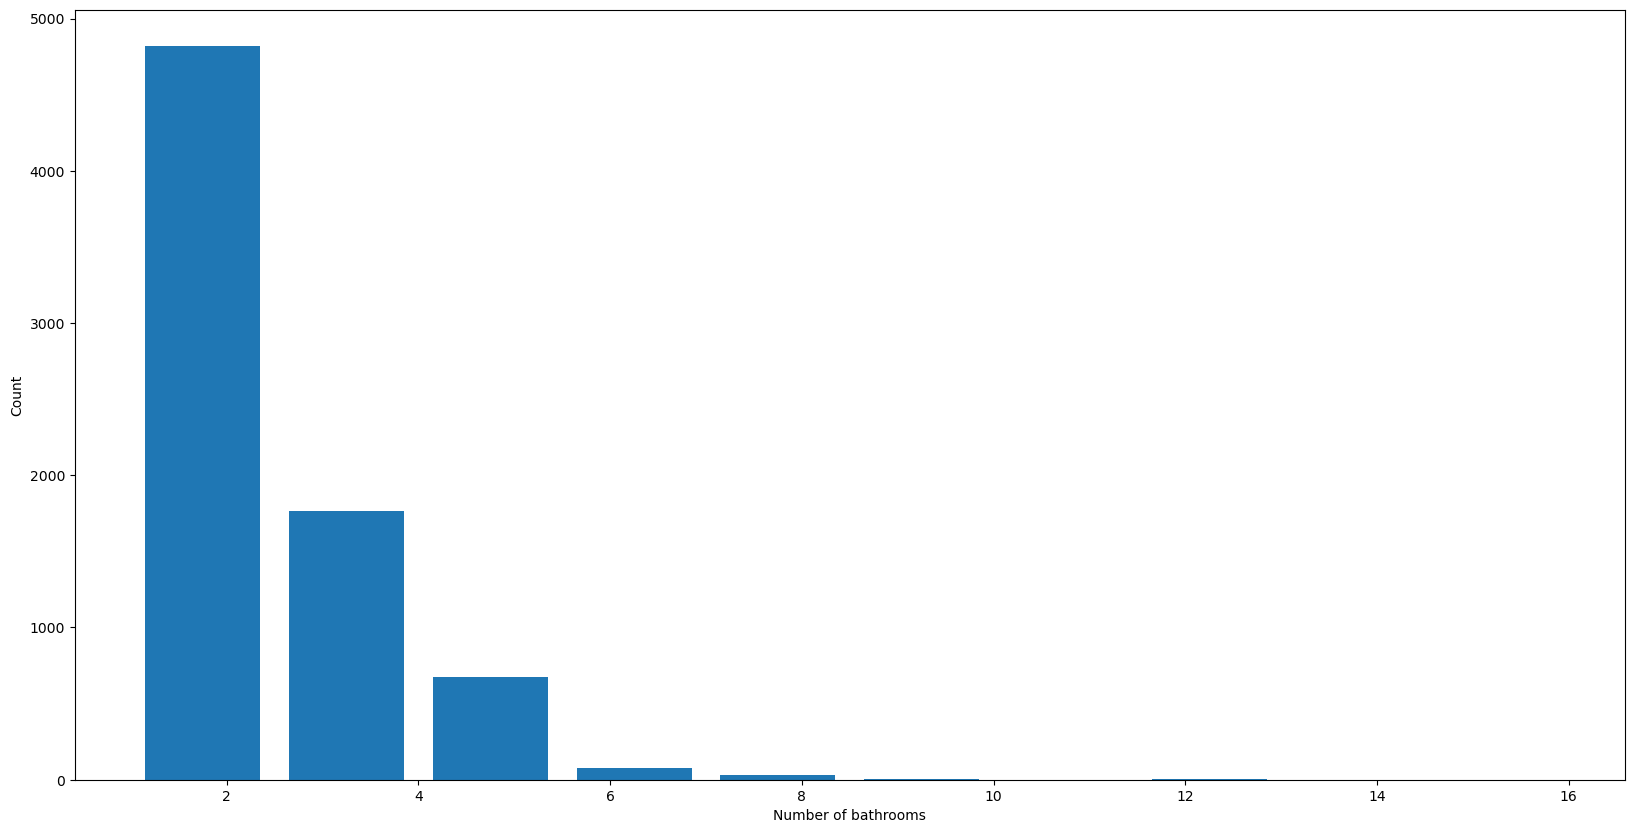

In [155]:
plt.hist(df6.bath,rwidth = 0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [156]:
df6[df6.bath>df6.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1648,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5268,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6750,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8461,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [157]:
df7 = df6[df6.bath<df6.bhk+2]
df7.shape

(7290, 7)

In [158]:
df8 = df7.drop(["size","price_per_sqft"],axis = 1)
df8.head(3)

,location,total_sqft,bath,price,bhk
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2


In [159]:
dummies= pd.get_dummies(df8.location)
dummies.head(3)

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [169]:
df9 = pd.concat([df8,dummies.drop("other",axis=1)],axis =1)

In [170]:
df9.head(4)

,location,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,83.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1425.0,2.0,65.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [179]:
df10 = df9.drop(["location"],axis =1)
df10.head(3)

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [180]:
x = df10.drop(["price"],axis = 1)

In [181]:
x.head(4)

,total_sqft,bath,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [182]:
y = df10["price"]

In [183]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state =10)

In [184]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
lr = model.fit(x_train,y_train)

In [185]:
lr

LinearRegression()

In [186]:
score = model.score(x_test,y_test)

In [187]:
score

0.800321521708873

In [205]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits = 5,test_size = 0.2,random_state = 0)
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.7965402 , 0.7856437 , 0.87045249, 0.80294871, 0.81344285])

In [209]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        "linear_regression": {
            "model": LinearRegression(),
            "params": {
                "fit_intercept": [True, False]
            }
        },
        "lasso": {
            "model": Lasso(),
            "params": {
                "alpha": [1e-3, 1e-2, 1e-1, 1]
            }
        },
        "random_forest_regressor": {
            "model": RandomForestRegressor(),
            "params": {
                "n_estimators": [10, 50, 100]
            }
        }
    }
    
    scores = []
    cv = 5

    for algo_name, config in algos.items():
        gs = GridSearchCV(config["model"], config["params"], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            "model": algo_name,
            "best_score": gs.best_score_,
            "best_params": gs.best_params_
        })
    
    return pd.DataFrame(scores, columns=["model", "best_score", "best_params"])

# Assuming x and y are already defined and preprocessed
result_df = find_best_model_using_gridsearchcv(x, y)



In [ ]:
result_df


    
   




In [222]:
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    for algo_name,config in algos in items():
        gs = GridSearchCV(config["model"], config["params"], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            "model": algo_name,
            "best_score": gs.best_score_,
            "best_params": gs.best_params_
        })
    
    return pd.DataFrame(scores, columns=["model", "best_score", "best_params"])
find_best_model_using_gridsearchcv(x,y)

NameError: name 'algos' is not defined

NameError: name 'svm' is not defined

In [200]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    "svm": {
        "model": svm.SVC(gamma="auto"),
        "params": {
            "C": [1, 10, 20],
            "kernel": ["rbf", "linear"]
        }
    },
    "random_forest": {
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators": [1, 5, 10]
        }
    },
    "logistic_regression": {
        "model": LogisticRegression(solver="liblinear", multi_class="auto"),
        "params": {
            "C": [1, 5, 10]
        }
    }
}




In [201]:
model_params = {
     "svm":{
         "model":svm.SVC(gamma = "auto"),
          "params":{
              "C":[1,10,20],
            "kernel":["rbf","linear"]
          }
     },
       "random_forest":{
           "model":RandomForestClassifier(),
           "params":{
               "n_estimators":[1,5,10]
           }
       },
         "logistic_regression" :{
                  "model":LogisticRegression(solver = "liblinear",multi_class = "auto"),
                   "params":{
                      "C" :[1,5,10]
                   }
         }
}
           